In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)#ignore future warnings common with plots

In [4]:
diabetes = pd.read_csv("diabetes-2.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
(diabetes
     .loc[:,'Glucose':'BMI'] # Select the appropriate columns
     .eq(0) #returns True for values equal to zero in each of the columns
     .sum() #Sums up the True values in each column (Since True ==1)
)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

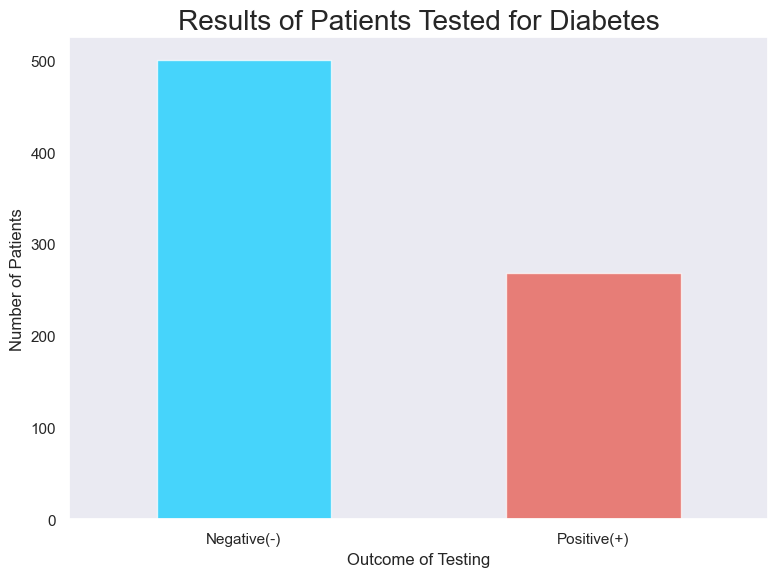

In [8]:
freq =diabetes['Outcome'].value_counts()

#Rename outcome 0 to Negative and outcome 1 to Positive for easier readability 
freq.index =['Negative(-)', 'Positive(+)']

sns.set()
freq.plot(kind ='bar',grid=False, figsize=(8,6), color =['#00CCFF', '#E74F43'], rot=0, alpha =0.7) # I rotated the xlabels to make it easier to read and tinkered with the transparency
plt.style.use('fivethirtyeight')
plt.title('Results of Patients Tested for Diabetes')
plt.xlabel('Outcome of Testing')
plt.ylabel('Number of Patients')
plt.tight_layout()

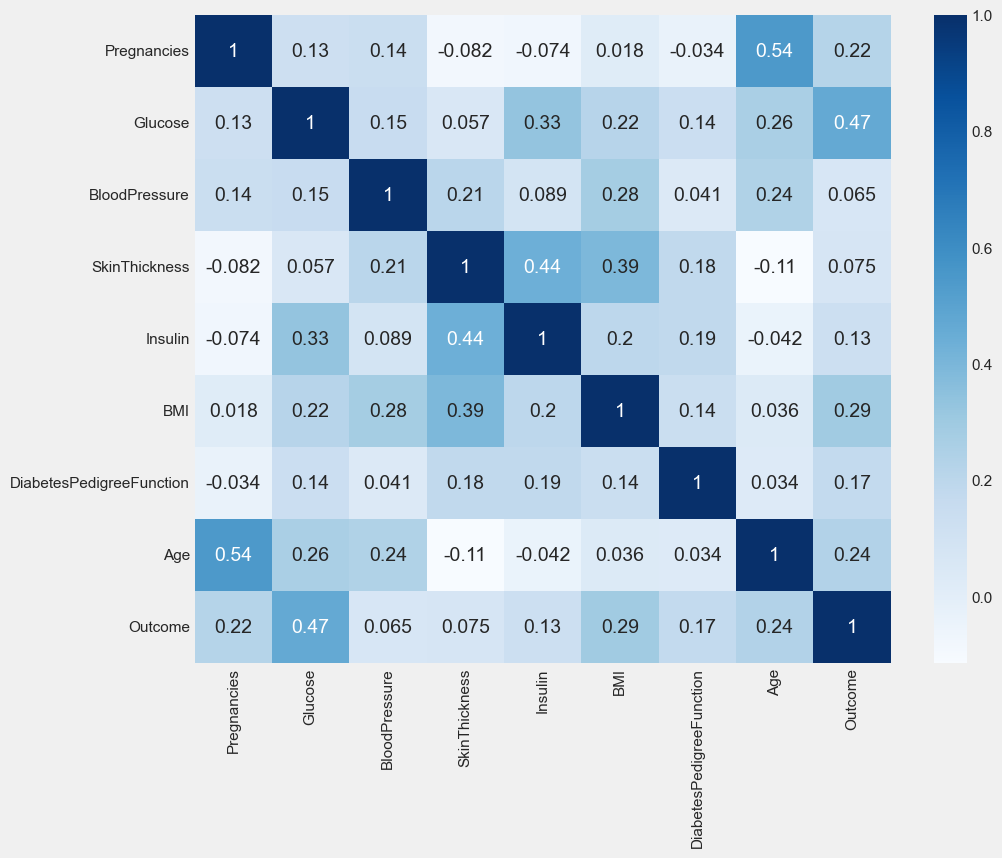

In [9]:
plt.figure(figsize=(10,8))
diab_corr=diabetes.corr() #To generate the correlation matrix
sns.heatmap(diab_corr, annot=True, cmap='Blues');

In [11]:
#use the replace method to replace the zero values in the selected columns
diabetes.loc[:, 'Glucose':'BMI'] = diabetes.loc[:, 'Glucose':'BMI'] .replace(0, np.nan)

In [14]:
for col in diabetes.columns[1:6]:    #iterate through the selected columns (Glucose through BMI)
     diabetes[col].fillna(diabetes[col].mean(), inplace=True)

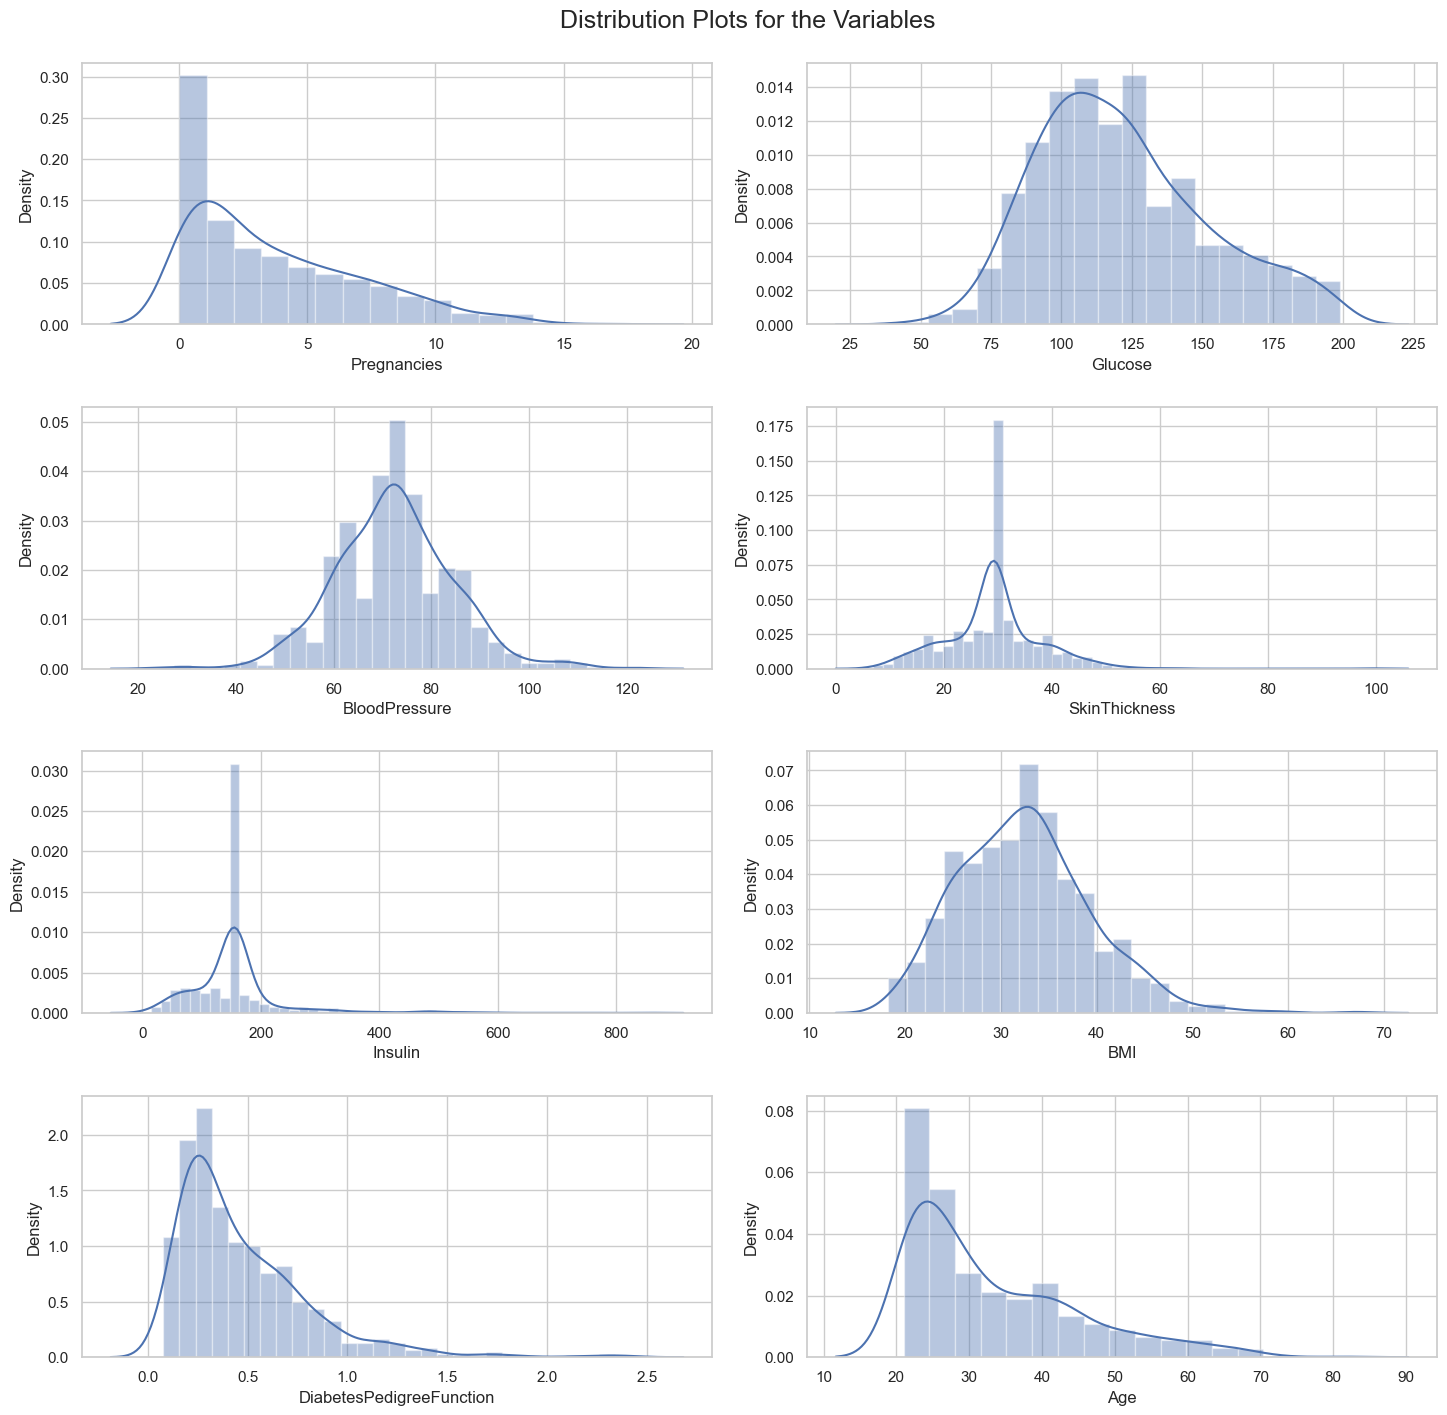

In [16]:
#For the Kernel Distribution 

fig, axes = plt.subplots(4, 2, figsize=(13,15))
sns.set(style="whitegrid")
plt.suptitle("Distribution Plots for the Variables",fontsize=18, y=0.95)
# plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=3)

#Combine iterators to plot distribution for each variable except the Output dependent variable
for i, ax in zip(diabetes.columns[0:-1].tolist(),axes.flat):
    sns.distplot(diabetes[i], ax=ax)

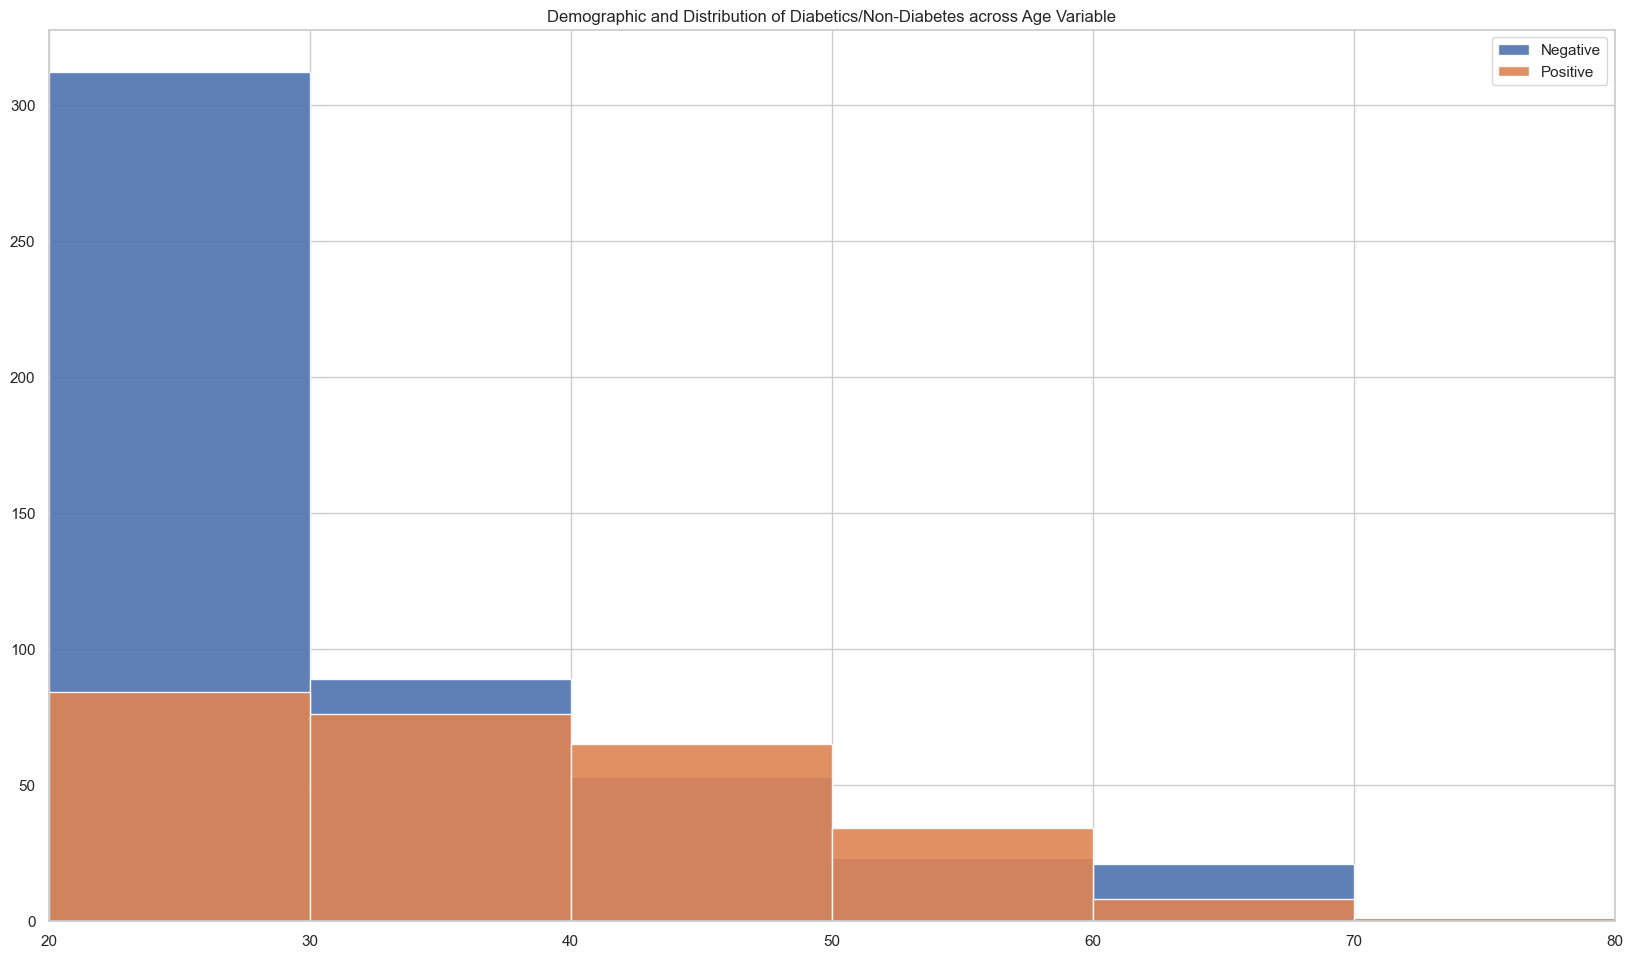

In [17]:
plt.figure(figsize=(8,11))
diabetes.groupby('Outcome')['Age'].hist(bins=[20,30,40,50,60,70,80],alpha=0.9) #df.Age.min() revealed that the minimum age is 21
plt.margins(x=0) #Resetting the x axis to start at the first bin to make a neater plot
plt.legend(labels=['Negative','Positive'])
plt.title('Demographic and Distribution of Diabetics/Non-Diabetes across Age Variable');

In [23]:
olympics=pd.read_csv('olympics-3.csv',header=4)
olympics.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [24]:
olympics.shape

(29216, 10)

In [27]:
olympics.groupby(['Edition','City'], as_index=False).Medal.count()

,Edition,City,Medal
0,1896,Athens,151
1,1900,Paris,512
2,1904,St Louis,470
3,1908,London,804
4,1912,Stockholm,885
5,1920,Antwerp,1298
6,1924,Paris,884
7,1928,Amsterdam,710
8,1932,Los Angeles,615
9,1936,Berlin,875


In [52]:
#Get the top sport with the most athlete for each year
group=(olympics
       .groupby(['Edition','Discipline'])['Athlete'].nunique()
       .unstack(level='Edition')
       .idxmax()
      )
group

Edition
1896      Athletics
1900         Rowing
1904      Athletics
1908    Artistic G.
1912    Artistic G.
1920    Artistic G.
1924      Athletics
1928      Athletics
1932      Athletics
1936      Athletics
1948      Athletics
1952      Athletics
1956      Athletics
1960      Athletics
1964      Athletics
1968      Athletics
1972      Athletics
1976         Rowing
1980         Rowing
1984         Rowing
1988      Athletics
1992      Athletics
1996      Athletics
2000      Athletics
2004      Athletics
2008      Athletics
dtype: object

In [53]:
#Get the country with the most medal for each year
country=(olympics
       .groupby(['Edition','NOC'])['Medal'].nunique()
       .unstack(level='Edition')
       .idxmax()
      )
country

Edition
1896    AUT
1900    BEL
1904    CUB
1908    ANZ
1912    ANZ
1920    BEL
1924    ARG
1928    ARG
1932    AUS
1936    ARG
1948    ARG
1952    ARG
1956    AUS
1960    AUS
1964    AUS
1968    AUS
1972    AUS
1976    BUL
1980    AUS
1984    AUS
1988    AUS
1992    AUS
1996    AUS
2000    ALG
2004    AUS
2008    AUS
dtype: object